In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Preprocess data

In [4]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [5]:
print train_data.shape
print test_data.shape

(10000, 15)
(4980, 15)


In [6]:
train_data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4332.092934,4009.310593,4264.054266,4186.133845,4341.806736,4620.233513,4128.806712,4615.799573,4227.690358,4230.877726,4202.469369,4279.113434,4620.525506,4373.028165,0.449100
std,3049.686671,35.609081,38.193985,6384.464028,29.420133,39.778819,5631.138585,18.893825,2614.621005,31.398484,40.769693,38.758534,1477.445084,1167.306090,0.497427
min,4197.950000,2830.770000,2457.440000,4058.460000,4304.620000,4002.050000,2086.150000,4567.690000,4153.850000,1816.410000,4100.000000,2257.950000,3504.100000,4205.640000,0.000000
25%,4280.510000,3990.260000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4189.740000,4267.690000,4590.260000,4342.050000,0.000000
50%,4293.850000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4131.790000,4346.670000,4626.150000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,5500.510000,6880.510000,642564.000000,6474.360000,8092.310000,567179.000000,5087.690000,265641.000000,4362.560000,6823.080000,6904.620000,152308.000000,121026.000000,1.000000


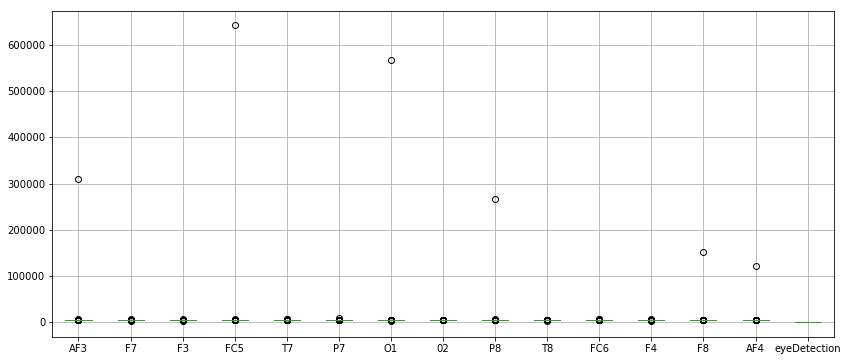

In [7]:
plt.figure(figsize=(14,6))
train_data.boxplot()
plt.show()

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
tmp = pd.DataFrame(scaler.fit_transform(train_data),columns=train_data.columns)

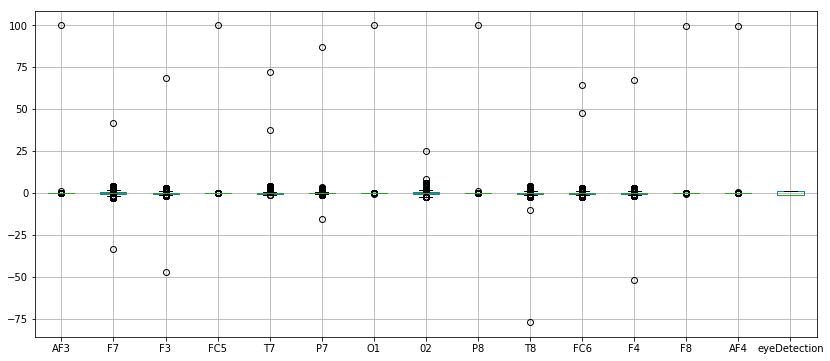

In [9]:
plt.figure(figsize=(14,6))
tmp.boxplot()
plt.show()

In [10]:
tmp2 = tmp.pop('eyeDetection')

In [11]:
from scipy import stats

train_data = train_data[(np.abs(stats.zscore(train_data)) < 3).all(axis=1)]

In [12]:
train_set_x = train_data
train_set_y = train_set_x.pop("eyeDetection")
test_set_x = test_data
test_set_y = test_set_x.pop("eyeDetection")

In [13]:
scaler = preprocessing.StandardScaler()

scaler.fit(train_set_x)
train_set_x = pd.DataFrame(scaler.transform(train_set_x),columns=train_set_x.columns)
test_set_x = pd.DataFrame(scaler.transform(test_set_x),columns=test_set_x.columns)

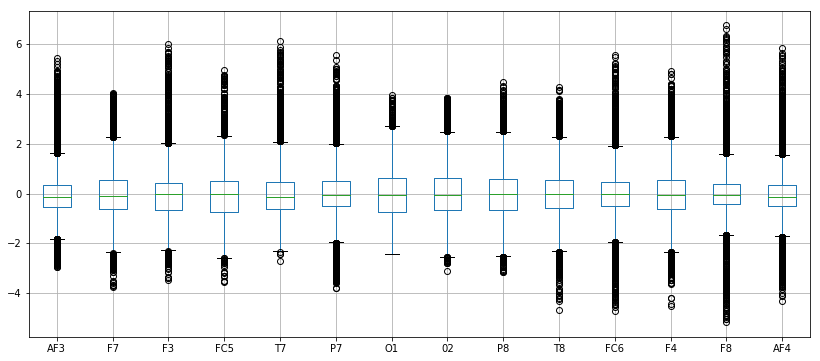

In [14]:
plt.figure(figsize=(14,6))
train_set_x.boxplot()
plt.show()

In [15]:
train_set_y.value_counts()

0    5360
1    4384
Name: eyeDetection, dtype: int64

In [16]:
base_score = float(5360) / (5360+4384)
print base_score

0.550082101806


# 2. Logistic regression

In [17]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn import linear_model
#http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn import metrics

clf_logistic = linear_model.LogisticRegression(C=1000000)
clf_logistic.fit(train_set_x,train_set_y)

train_predictions = clf_logistic.predict(train_set_x)
test_predictions = clf_logistic.predict(test_set_x)

print metrics.accuracy_score(train_predictions,train_set_y)
print metrics.accuracy_score(test_predictions,test_set_y)

0.6364942528735632
0.6405622489959839


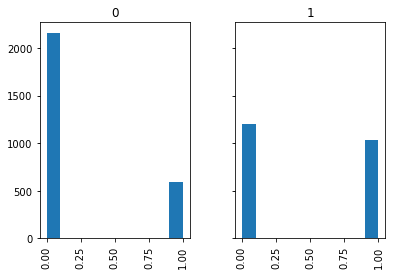

In [18]:
tmp = pd.DataFrame()
tmp["predictions"] = test_predictions
tmp["targets"] = test_set_y

tmp.hist(column="predictions",by="targets",sharey=True)
plt.show()

c:\users\pitro11a\anaconda2\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


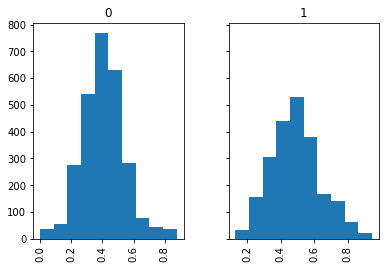

In [19]:
test_predictions = clf_logistic.predict_proba(test_set_x)

tmp = pd.DataFrame()
tmp["predictions"] = test_predictions[:,1]
tmp["targets"] = test_set_y

tmp.hist(column="predictions",by="targets",sharey=True)
plt.show()

# 3. Model evaluation

In [20]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf_logistic,train_set_x,train_set_y,cv=5)
print cv_scores
print np.mean(cv_scores)

[0.64391996 0.63981529 0.62955362 0.6331452  0.62679671]
0.6346461566664523


In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

predicted = cross_val_predict(clf_logistic, train_set_x, train_set_y, cv=5)
print metrics.accuracy_score(train_set_y, predicted) 

0.6346469622331691


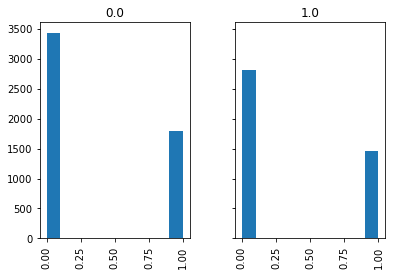

In [22]:
tmp = pd.DataFrame()
tmp["predictions"] = predicted
tmp["targets"] = train_set_y

tmp.hist(column="predictions",by="targets",sharey=True)
plt.show()

In [23]:
predicted = cross_val_predict(clf_logistic, train_set_x, train_set_y, cv=5, method="predict_proba")
print predicted

[[0.92630034 0.07369966]
 [0.52961681 0.47038319]
 [0.58477159 0.41522841]
 ...
 [0.73575449 0.26424551]
 [0.81712852 0.18287148]
 [0.23827252 0.76172748]]


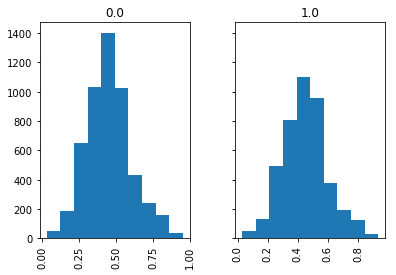

In [24]:
tmp = pd.DataFrame()
tmp["predictions"] = predicted[:,1]
tmp["targets"] = train_set_y

tmp.hist(column="predictions",by="targets",sharey=True)
plt.show()

In [25]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for train, test in kf.split(train_set_x):
    clf_logistic.fit(train_set_x.iloc[train],train_set_y.iloc[train])
    predicted = clf_logistic.predict(train_set_x.iloc[test])
    print metrics.accuracy_score(train_set_y.iloc[test], predicted) 

0.6469984607491021
0.6326321190354027
0.6269881990764494
0.6413545407901488
0.6252566735112937


In [26]:
from sklearn.metrics import roc_curve

predicted = cross_val_predict(clf_logistic, train_set_x, train_set_y, cv=5, method="predict_proba")

fpr, tpr, thresholds = roc_curve(train_set_y,predicted[:,1])

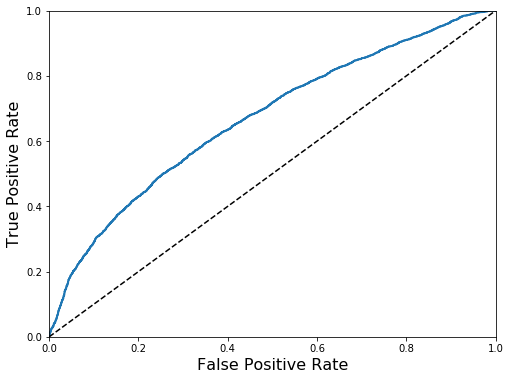

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [28]:
print metrics.auc(fpr, tpr)

0.667847889884519


In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(train_set_y,predicted[:,1])

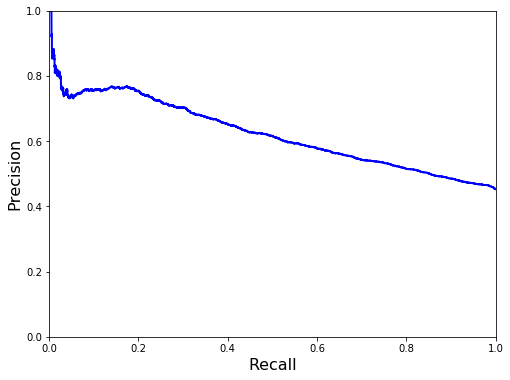

In [30]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [31]:
clf_logistic.fit(train_set_x,train_set_y)
print clf_logistic.coef_

[[ 0.38299458 -0.49519696  0.13239299 -0.18776246  0.41745868 -0.5085599
   0.02955731  0.06870353  0.04416482  0.08405475 -0.21811856  0.22760845
  -0.04140054  0.03664326]]


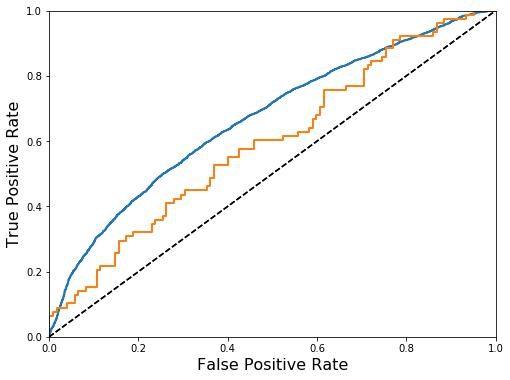

In [32]:
#Exercise: perform 5-fold cross-validation on the smaller train-set below and plot the ROC
train_set_x_small = train_set_x.iloc[:200]
train_set_y_small = train_set_y.iloc[:200]

predicted_small = cross_val_predict(clf_logistic, train_set_x_small, train_set_y_small, cv=5, method="predict_proba")

fpr_small, tpr_small, thresholds = roc_curve(train_set_y_small,predicted_small[:,1])

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr_small, tpr_small)
plt.show()

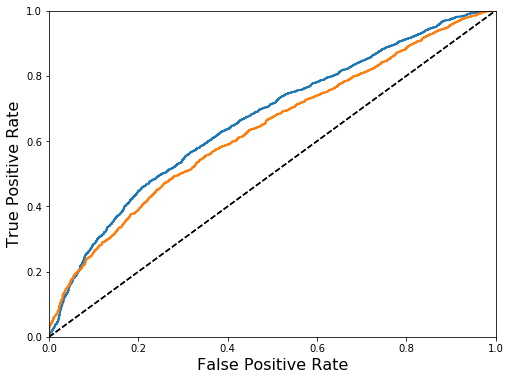

In [33]:
#Exercise: fit a logistic regression model on the full and the small train-set 
#          and plot a ROC curve for the predictions on the test-set

clf_logistic.fit(train_set_x,train_set_y)
predicted = clf_logistic.predict_proba(test_set_x)
fpr, tpr, thresholds = roc_curve(test_set_y,predicted[:,1])

clf_logistic.fit(train_set_x_small,train_set_y_small)
predicted_small = clf_logistic.predict_proba(test_set_x)
fpr_small, tpr_small, thresholds = roc_curve(test_set_y,predicted_small[:,1])

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr_small, tpr_small)
plt.show()

# 4. Regularization

In [34]:
from sklearn.model_selection import GridSearchCV

params = {'C':[0.001,0.01,0.1,1,10]}

GSCV = GridSearchCV(clf_logistic, params,cv=5)
GSCV.fit(train_set_x,train_set_y)

print GSCV.best_score_
print GSCV.best_estimator_

0.6350574712643678
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [35]:
#Exercise: find the optimal value for C for a lgostic regression model with penalty='l1'

clf_logistic_l1 = linear_model.LogisticRegression(penalty='l1')

GSCV = GridSearchCV(clf_logistic_l1, params,cv=5)
GSCV.fit(train_set_x,train_set_y)

print GSCV.best_score_
print GSCV.best_estimator_

0.6353653530377669
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [36]:
#Exercise: print the model-parameters for the best model obtained above
print GSCV.best_estimator_.coef_

[[ 0.37051903 -0.48073648  0.11959138 -0.16487404  0.38244149 -0.48095762
   0.02933936  0.07037278  0.03362194  0.07124343 -0.19192249  0.21615464
   0.          0.00838184]]


In [37]:
#Exercise: how well does the best model perform on the test-set (compute AUC)?
GSCV.best_estimator_.fit(train_set_x,train_set_y)
predicted = GSCV.best_estimator_.predict_proba(test_set_x)
fpr, tpr, thresholds = roc_curve(test_set_y,predicted[:,1])
print metrics.auc(fpr, tpr)

0.6657021333208121


In [60]:
#Exercise: fit a logistic regression model withe peanlty='l1' and C=0.01
#          and print the model parameters again.
clf_logistic_l1 = linear_model.LogisticRegression(penalty='l1',C=0.01)
clf_logistic_l1.fit(train_set_x, train_set_y)
print clf_logistic_l1.coef_

[[ 0.19165572 -0.37292737  0.          0.          0.13938763 -0.26689948
   0.0048416   0.04179607  0.          0.02915612  0.          0.20145322
   0.          0.05446293]]


In [61]:
#Exercise: how wel does this model perform on the test-set (compute the AUC)?
predicted = clf_logistic_l1.predict_proba(test_set_x)
fpr, tpr, thresholds = roc_curve(test_set_y,predicted[:,1])
print metrics.auc(fpr, tpr)

0.6464623342880844


# 5. Linear SVM

In [65]:
#Exercise: find the best value for C on the small train-set

#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

params = {'C':[0.001,0.01,0.1,1,10,100]}
GSCV = GridSearchCV(clf_svm, params,cv=5,n_jobs=4)

train_set_x_small = train_set_x.iloc[:200]
train_set_y_small = train_set_y.iloc[:200]

GSCV.fit(train_set_x_small,train_set_y_small)

print GSCV.best_score_
print GSCV.best_estimator_

0.61
SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [67]:
#Exercise: what is the performance (accuracy) of the best model fitted on the full train-set on the test-set?
GSCV.best_estimator_.fit(train_set_x,train_set_y)
predicted = GSCV.best_estimator_.predict(test_set_x)
print metrics.accuracy_score(predicted,test_set_y)

0.6070281124497992


In [69]:
#Exercise: what is the AUC performance on the test-set?
predicted = GSCV.best_estimator_.decision_function(test_set_x)
fpr, tpr, thresholds = roc_curve(test_set_y,predicted)
print metrics.auc(fpr, tpr)

0.6513453251109963


# 6. Decision tree

In [70]:
#Exercise: optimze a Decision tree on the train-set

#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()

params_DT = {'criterion':['gini','entropy'], 'min_samples_split':[10,100,1000]} 

GSCV = GridSearchCV(clf_DT, params_DT,cv=5)
GSCV.fit(train_set_x,train_set_y)

print GSCV.best_score_
print GSCV.best_estimator_

0.8170155993431856
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [71]:
#Exercise: what is the performance (accuracy) of the best model fitted on the full train-set on the test-set?
GSCV.best_estimator_.fit(train_set_x,train_set_y)
predicted = GSCV.best_estimator_.predict(test_set_x)
print metrics.accuracy_score(predicted,test_set_y)

0.8192771084337349


# 7. RBF SVM

In [72]:
#Exercise: what is the performance (accuracy and AUC) of an optimized RBF SVM on the test set?
#Tip: optimize on small train-set
clf_svm = svm.SVC(kernel='rbf')

params = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}

train_set_x_small = train_set_x.iloc[:200]
train_set_y_small = train_set_y.iloc[:200]

GSCV = GridSearchCV(clf_svm, params,cv=5)
GSCV.fit(train_set_x_small,train_set_y_small)

print GSCV.best_score_
print GSCV.best_estimator_

GSCV.best_estimator_.fit(train_set_x,train_set_y)
predicted = GSCV.best_estimator_.predict(test_set_x)
print metrics.accuracy_score(predicted,test_set_y)

predicted = GSCV.best_estimator_.decision_function(test_set_x)
fpr, tpr, thresholds = roc_curve(test_set_y,predicted)
print metrics.auc(fpr, tpr)

0.735
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.9150602409638554
0.9729379594413401


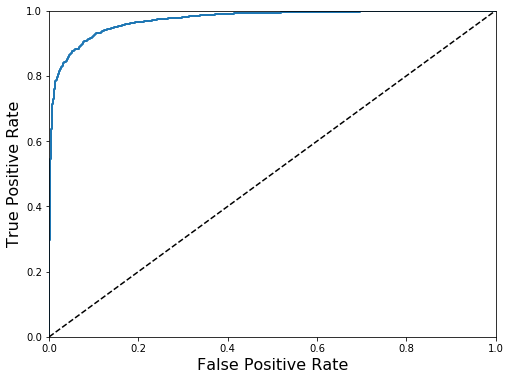

In [73]:
#Exercise: plot the ROC curve for the test-set
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

# 8. Bagging

In [75]:
from sklearn.ensemble import BaggingClassifier

clf_logistic_bagged = BaggingClassifier(clf_logistic,n_estimators=50,max_samples=0.7)
scores = cross_val_score(clf_logistic_bagged, train_set_x, train_set_y, cv=5)
print scores
print np.mean(scores)

[0.64289379 0.63776296 0.63211904 0.6331452  0.62731006]
0.6346462093444435


In [76]:
params_bagged = {'n_estimators':[10,30,50], 'max_samples':[0.4,0.6,0.8]} #make them increase max_depth

GSCV = GridSearchCV(clf_logistic_bagged, params_bagged,cv=5)
GSCV.fit(train_set_x,train_set_y)

print GSCV.best_score_
print GSCV.best_estimator_

0.6371100164203612
BaggingClassifier(base_estimator=LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.4, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


In [77]:
#Exercise: what is the effect of bagging on a Decision tree classifier?
from sklearn.ensemble import BaggingClassifier

clf_DT_bagged = BaggingClassifier(clf_DT,n_estimators=50,max_samples=0.7)
scores = cross_val_score(clf_DT_bagged, train_set_x, train_set_y, cv=5)
print scores
print np.mean(scores)

GSCV = GridSearchCV(clf_DT_bagged, params_bagged,cv=5)
GSCV.fit(train_set_x,train_set_y)

print GSCV.best_score_
print GSCV.best_estimator_

[0.89533094 0.91174962 0.89173935 0.89533094 0.89168378]
0.897166924964416


# 9. Random Forest

In [86]:
#Exercise: what is the performance (accuracy and AUC) of an optimized Random Forest on the test set?
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
from scipy.stats import uniform 

clf_RF = RandomForestClassifier()

params_dist_RF = {
                "max_features": uniform(0.1,0.6),
                "min_samples_split": randint(2, 100),
                "n_estimators": randint(10, 100)
                }

n_iter_search = 50

RSCV = RandomizedSearchCV(clf_RF, params_dist_RF,cv=5,n_jobs=-1,n_iter=n_iter_search)
RSCV.fit(train_set_x,train_set_y)

print RSCV.best_score_
print RSCV.best_estimator_

RSCV.best_estimator_.fit(train_set_x,train_set_y)
predicted = RSCV.best_estimator_.predict(test_set_x)
print metrics.accuracy_score(predicted,test_set_y)

predicted = RSCV.best_estimator_.predict_proba(test_set_x)
fpr, tpr, thresholds = roc_curve(test_set_y,predicted[:,1])
print metrics.auc(fpr, tpr)

0.9068144499178982
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.15467588749129085,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=95, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.9108433734939759
0.9674911013809979


In [85]:
print RSCV.best_estimator_.feature_importances_

[0.07774306 0.09835868 0.05008203 0.05434324 0.04838262 0.11507947
 0.13214353 0.05038586 0.0332003  0.05102164 0.05810368 0.06102239
 0.0908887  0.0792448 ]


# 10. Extreme Gradient Boosting

In [84]:
#conda install py-xgboost
#Exercise: what is the performance (accuracy and AUC) of an optimized XGBoost on the test set?
from xgboost import XGBClassifier 

clf_xgb = XGBClassifier() 
 
param_dist = {"n_estimators"     : randint(10,200), 
              "max_depth"        : randint(3,7), 
              "learning_rate"    : uniform(0.01,0.25), 
              "gamma"            : uniform(0.0,25.0), 
              "reg_lambda"       : uniform(0.0,25.0)
             } 
 
n_iter_search = 50
 
RSCV = RandomizedSearchCV(clf_xgb, param_distributions=param_dist, 
                                   n_iter=n_iter_search,verbose=0,
                                   n_jobs=-1,cv=5) 
 
RSCV.fit(train_set_x, train_set_y) 
 
print RSCV.best_score_
print RSCV.best_estimator_

RSCV.best_estimator_.fit(train_set_x,train_set_y)
predicted = RSCV.best_estimator_.predict(test_set_x)
print metrics.accuracy_score(predicted,test_set_y)

predicted = RSCV.best_estimator_.predict_proba(test_set_x)
fpr, tpr, thresholds = roc_curve(test_set_y,predicted[:,1])
print metrics.auc(fpr, tpr)

0.8008004926108374
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=5.581381105126626, learning_rate=0.21518661602506559,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=122, nthread=-1, objective='binary:logistic',
       reg_alpha=4.807112805117939, reg_lambda=15.01875732520584,
       scale_pos_weight=12.9111755330391, seed=0, silent=True, subsample=1)
0.8110441767068273
0.9629516318156444


c:\users\pitro11a\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
